Задача: развернуть базу данных на одной машине, на другой машине получать запросы с апи яндекс метрики и заливать в базу данных.  
С помощью гугл клауд создаем две машины.  
На одной поднимаем базу данных.  
На другой машине устанавливаем питон и нужные библиотеки. Закидываем на эту машину скрипты питона, для ETL  
Помещаем в scheduler наши скрипты, чтобы по расписанию у нас заливались данные из яндекс метрики в нашу базу данных.  

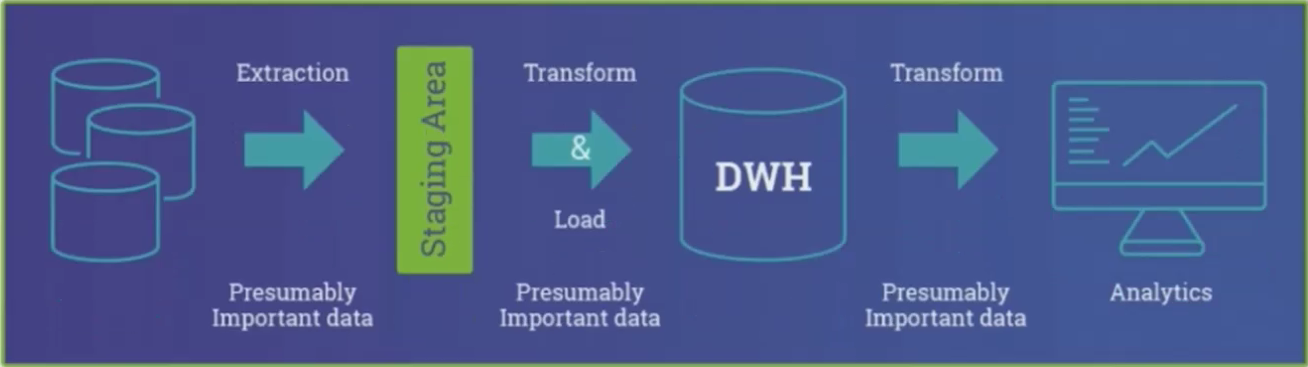

In [1]:
from PIL import Image
Image.open('etl_picture.png')

Создаем машину (instance) для базы данных  
Порядок действий следующий:  
клауд гугл, консоль, слева вверху нажимаем на меню, выбираем sql, create instance,   
выбираем mysql, указываем имя базы данных и пароль, далее ниже в настройках set connectivity ставим галочку  
private ip, выбираем cpu (configure machine type and storage), нажимаем создать,   

Создаем машину (instance) staging area (где будут работать наши скрипты, будут забирать данные из источников, обрабатывать и гурзить в нашу базу данных)   
Порядок действий следующий:   
клауд гугл, консоль, слева вверху нажимаем на меню, выбираем compute engine, vm instances, create, задаем название и выбираем параметры, create.  



Настроим нашу базу данных

Открываем нашу базу данных на гугл клауд. У нас есть публичный ай пи адрес, по которому мы можем зайти извне в нашу базу данных 
(извне, то есть не из какой-то машины гугл клауда), но тогда мы должны в настрйоках указать наш адрес, с которого мы входим (ниже написано как сделать).И есть прайвит ай пи,  
по которому мы можем войти в нашу базу данных из системы гугл клауда (то есть из любого инстанса (машины) в гугл клауда). Сейчас мы будем настраивать базу,  
находясь на машине базы данных, поэтому будем использовтаь прайвит ай пи.  
Нажимаем connections, add network, далее узнаем текущий ай пи нашей системы (не в клауде, а нашего компа), add network, указываем имя и вносим ай пи и сохраняем.  
Теперь с этого ай пи мы можем коннектится к нашей базе данных.   
Теперь настроим нашу cpu для staging area.  
Открыываем VM instances и нажимаем ssh.   

In [ ]:
# Обновляем систему
sudo apt-get update && sudo apt-get upgrade && sudo apt-get dist-upgrade && sudo apt-get autoremove

In [ ]:
# устанавливаем клиент mysql. чтобы конектиться к базе данных  
sudo apt-get install mysql-client

In [ ]:
# пробуем подконектиться к sql серверу
# в терминале набираем host_name указываем наш прайвит ай пи базы данных, root так и будет, а пароль, который указывали при создании базы  
mysql -h host_name -u root -p password
# мы внутри сервера
# можно посмотреть какие базы есть, 
show databases;
# всё ок

теперь нам нужно установить питон на нашу staging area и настроить библиотеки

In [ ]:
sudo apt-get install python3, python3-pip

теперь закинем файл requirements.txt на эту машину  
нажимаем в терминале справа вверху шестеренку и выбираем upload file и выбираем файл  
теперь установим библиотеки из этого файла

In [ ]:
pip3 install -r requirements.txt

создадим базу данных, в которую будем лить данные

In [ ]:
# пробуем подконектиться к sql серверу
# в терминале набираем host_name указываем наш прайвит ай пи базы данных, root так и будет, а пароль, который указывали при создании базы  
mysql -h host_name -u root -p password
# мы внутри сервера
create database analytics;
# выберем базу
use analytics;
# посмотрим таблицы, их конечно нет
show tables;

теперь как текстовый файл загружаем наши питоновские файлы  
можно запускать app.py

In [ ]:
python3 app.py

Теперь настроим cron, чтобы автоматизировать процесс

cron это демон в линуксе, который может по расписанию запускать скрипты (по сути он выполняет по расписанию bash команды)  
crontab -e (создает файл, если его нет, если есть, то открывает на редактирование)  
crontab -l (открывает список задача в кроне)  
crontab -r (удаляет крон файл)  
crontab -v (показывает время, когда последний раз редактировался крон файл)  

Пользователь сам может выбрать подходящий для него формат, снимая или устанавливая "галочку" в опции "Поле года" (Year field)  
диалогового окна "Параметры" (двойной щелчок на иконке nnCron в системном трее). По умолчанию nnCron использует "улучшенный" формат.

Вот его схема:

https://nncron.ru/help/RU/working/cron-format.htm

In [ ]:
* * * * * 
| | | | | 
| | | | | 
| | | | +----- Дни недели (диапазон: 1-7)
| | | +------- Месяцы     (диапазон: 1-12)
| | +--------- Дни месяца (диапазон: 1-31)
| +----------- Часы       (диапазон: 0-23)
+------------- Минуты     (диапазон: 0-59)    

создадим распсание крона

In [ ]:
crontab -e

выбираем редактор, например, nano

In [ ]:
# вначале пишем эту строчку, это значит каждую минуту будет запускаться эта команда
* * * * * python3 cron_testing.py

сохраняем ctrl + o

можно протестиьть работу крона,  
для этого загрузим файл cron_testing.py на машину

In [ ]:
# проверим, что все записалось
crontab -l

все ок, теперь можно смотреть в базе, что наш крон работает

теперь настроим крон, чтобы он ночью заливал данные

In [ ]:
crontab -e

In [ ]:
# в будет каждый день в 0:00 по времени гугла запускаться
0 0 * * * python3 app.py